In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [3]:
import msprime
msprime.__version__

'1.0.2'

In [ ]:
#to_load_bench = glob.glob('/home/kele/Documents/lai/lai-sim/results/AmericanAdmixture_4B11/AA_42/*/benchmark/*.tsv')
#to_load_bench += glob.glob('/home/kele/Documents/lai/lai-sim/results/OutOfAfrica_4J17/4pop_79/*/benchmark/*.tsv')

In [12]:
def get_IDs(path):
    separated = path.split(os.sep)
    return tuple(separated[9:12])

In [13]:
benchmark_files = glob.glob('/home/kele/Documents/lai/report/results/lai-sim/results/*/*/*/benchmark/*.tsv')

In [21]:
bench_dict = {}
for f in benchmark_files:
    df = pd.read_csv(f, sep ='\t')
    model_name, sim_id, anal_id = get_IDs(f)
    df[['model_name', 'sim_id', 'anal_id']] = model_name, sim_id, anal_id
    df['method'] = f.split(os.sep)[-1].split('.')[0].split('_')[1]
    bench_dict[f] = df#.set_index([ 'model_name', 'sim_id', 'anal_id', 'method'])
bench = pd.concat(bench_dict.values())
bench = bench.replace('mosaic', 'MOSAIC')
bench = bench.query("anal_id not in ['long_run', 'short_run']")

In [22]:
bench.head(3)

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,model_name,sim_id,anal_id,method
0,5386.4046,1:29:46,80646.94,85236.32,16276.22,21256.72,577.10,41.48,191.24,3112.94,AmericanAdmixture_4B11,AA_42,3pop_d,MOSAIC
0,593.7146,0:09:53,3938.75,37819.44,3936.72,3937.49,28.95,0.30,1154.42,6855.90,AmericanAdmixture_4B11,AA_42,3pop_d,bmix
0,1868.4323,0:31:08,4969.39,16314.31,4966.24,4967.00,33.52,150.74,1047.04,19555.83,AmericanAdmixture_4B11,AA_42,3pop_d,RFMix2


In [19]:
sns.set_context('notebook', font_scale= 1.4)

In [23]:
names_dict = {}
names_dict['3pop_1'] = '100 admixed'
names_dict['3pop_2'] = '200 admixed'
names_dict['3pop_3'] = '400 admixed'
names_dict['3pop_4'] = 'Smaller ref panel (200/pop)'
names_dict['3pop_5'] = 'Larger ref panel (800/pop)'
names_dict['3pop_6'] = 'More sites (200K)'
names_dict['3pop_7'] = 'Lower geno error (1e-5)'
names_dict['3pop_8'] = 'Higher geno error (4e-4)'
names_dict['3pop_9'] = 'Fewer cores (4)'

names_dict['3pop_b'] = '3pops, 100K sites'
names_dict['3pop_d'] = '3pops, 200K sites'
names_dict['3pop_e'] = '3pops, 300K sites'

names_dict['4pop_b'] = '4pops, 100K sites'
names_dict['4pop_d'] = '4pops, 200K sites'
names_dict['4pop_e'] = '4pops, 300K sites'

In [29]:
threepop_order = [
 '3pop_1',
 '3pop_2',
 '3pop_3',
 '3pop_4',
 '3pop_5',
 '3pop_6',
 '3pop_7',
 '3pop_8',
 '3pop_9',
 '3pop_b',
 '3pop_d',
 '3pop_e'
]

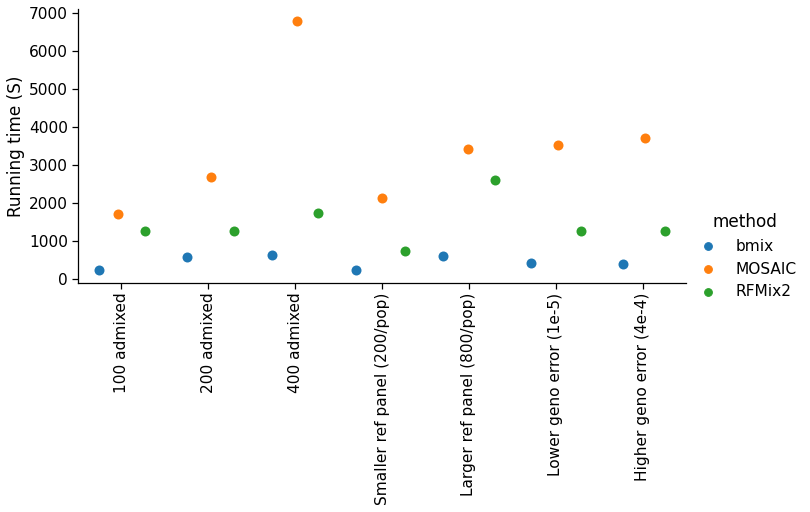

In [32]:
# Show each observation with a scatterplot
#data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')

to_plot = [x for x in threepop_order[:8] if x != '3pop_6'] 

g = sns.catplot(
    x="anal_id",
    y="s",
    hue="method",
    #col='ancestry',
    order = to_plot,
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    data=bench.sort_values('anal_id'),
    dodge=True,
    alpha=1,
    kind='strip',
    aspect = 2,
    s=10
)
g.set_xticklabels([names_dict[x] for x in to_plot])
g.set_xticklabels(rotation=90)
g.set_ylabels('Running time (S)')
g.set(xlabel='')


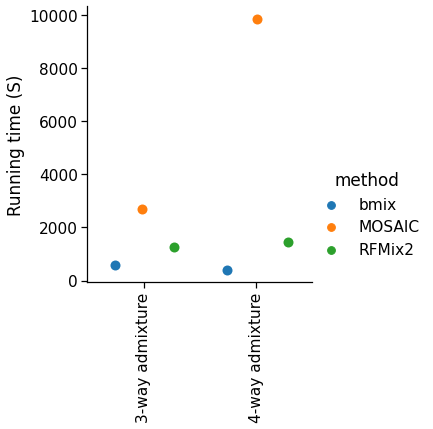

In [37]:
# Show each observation with a scatterplot
to_plot = ['3pop_2', '4pop_b']


g = sns.catplot(
    x="anal_id",
    y="s",
    hue="method",
    #col='ancestry',
    order = to_plot,
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    data=bench.sort_values('anal_id'),
    dodge=True,
    alpha=1,
    kind='strip',
    aspect = 1,
    s=10
)
g.set_xticklabels(['3-way admixture', '4-way admixture'], rotation=90)
g.set_xticklabels(rotation=90)
g.set_ylabels('Running time (S)')
g.set(xlabel='')

In [38]:
# load in memory benchmark data

In [60]:
mem_bench = pd.read_csv('/home/kele/Documents/lai/report/results/lai-sim/results/memory_usage.txt', header = None, sep = ' ', 
            skipinitialspace=True)
mem_bench.columns = ['jobid', 'none', 'mem']
mem_bench.head()

,jobid,none,mem
0,41398,maxvmem,3.857GB
1,41399,maxvmem,4.907GB
2,41400,maxvmem,23.119GB
3,41401,maxvmem,3.129GB
4,41402,maxvmem,23.106GB


In [ ]:
jobs = pd.read_csv('/home/kele/Documents/lai/report/results/lai-sim/results/jobs.tsv', 
    sep = '\t', 
    skipinitialspace=True)
jobs.columns = ['analysis', 'bmix', 'MOSAIC', 'RFMix2']

jobs = jobs.melt(id_vars='analysis', value_name='jobid'
                ).dropna()
jobs['jobid'] = jobs['jobid'].astype(int)
jobs.head()

In [89]:
mem_bench_results = jobs.merge(mem_bench)
mem_bench_results = mem_bench_results.groupby(['analysis', 'variable'])[['mem']].min().reset_index()
mem_bench_results.columns = ['anal_id', 'method', 'mem']
mem_bench_results['mem (GB)'] = mem_bench_results.mem.str.strip('GB').astype(float)
mem_bench_results.head()

,anal_id,method,mem,mem (GB)
0,3pop_1,MOSAIC,33.895GB,33.895
1,3pop_1,RFMix2,2.449GB,2.449
2,3pop_1,bmix,3.154GB,3.154
3,3pop_2,MOSAIC,34.416GB,34.416
4,3pop_2,RFMix2,2.443GB,2.443


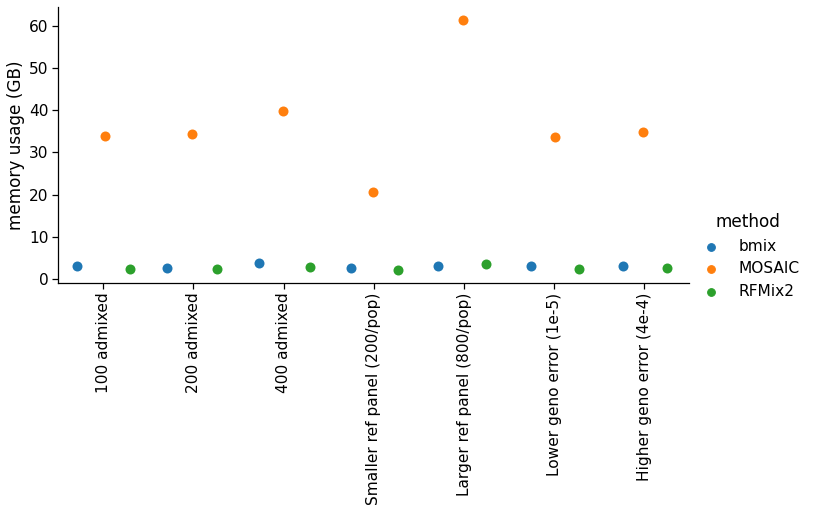

In [92]:
# Show each observation with a scatterplot
#data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')

to_plot = [x for x in threepop_order[:8] if x != '3pop_6'] 

g = sns.catplot(
    x="anal_id",
    y="mem (GB)",
    hue="method",
    #col='ancestry',
    order = to_plot,
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    data=mem_bench_results.sort_values('anal_id'),
    dodge=True,
    alpha=1,
    kind='strip',
    aspect = 2,
    s=10
)
g.set_xticklabels([names_dict[x] for x in to_plot])
g.set_xticklabels(rotation=90)
g.set_ylabels('memory usage (GB)')
g.set(xlabel='')


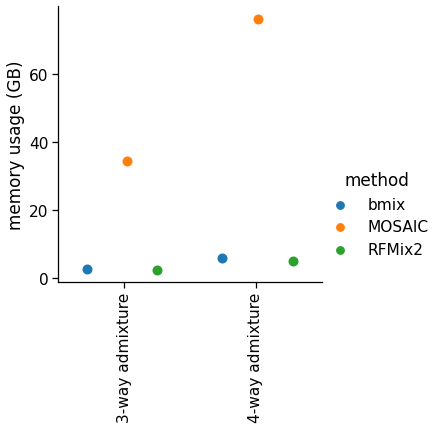

In [94]:
# Show each observation with a scatterplot
#data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')

to_plot = ['3pop_2', '4pop_b']

g = sns.catplot(
    x="anal_id",
    y="mem (GB)",
    hue="method",
    #col='ancestry',
    order = to_plot,
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    data=mem_bench_results.sort_values('anal_id'),
    dodge=True,
    alpha=1,
    kind='strip',
    aspect=1,
    s=10
)
g.set_xticklabels(['3-way admixture', '4-way admixture'], rotation=90)
g.set_xticklabels(rotation=90)
g.set_ylabels('memory usage (GB)')
g.set(xlabel='')


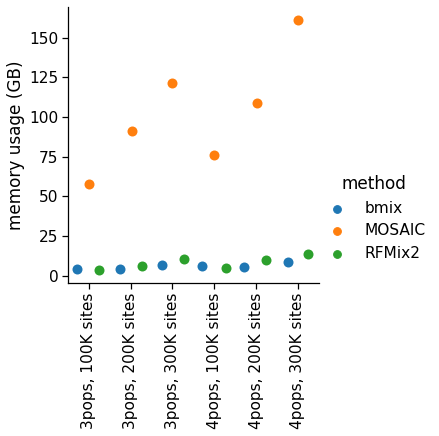

In [96]:



# Show each observation with a scatterplot
#data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')

to_plot = ['3pop_b', '3pop_d', '3pop_e', '4pop_b', '4pop_d', '4pop_e']

g = sns.catplot(
    x="anal_id",
    y="mem (GB)",
    hue="method",
    #col='ancestry',
    order = to_plot,
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    data=mem_bench_results.sort_values('anal_id'),
    dodge=True,
    alpha=1,
    kind='strip',
    aspect=1,
    s=10
)
#g.set_xticklabels(['3-way admixture', '4-way admixture'], rotation=90)
g.set_xticklabels([names_dict[x] for x in to_plot])
g.set_xticklabels(rotation=90)
g.set_ylabels('memory usage (GB)')
g.set(xlabel='')


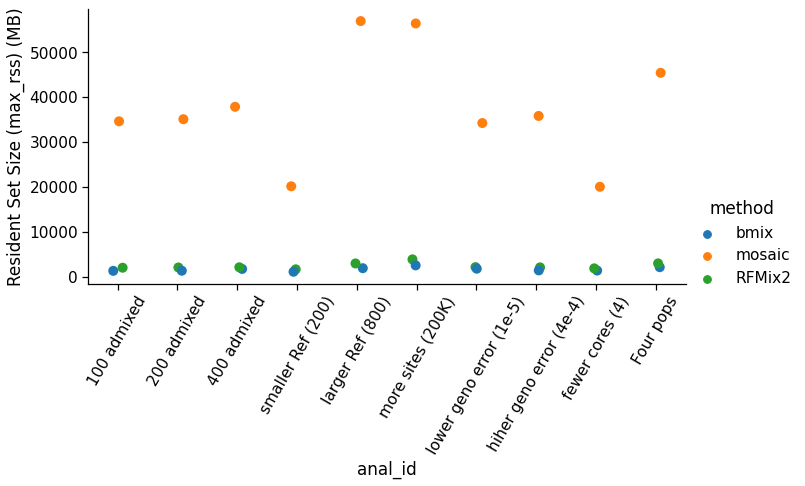

In [97]:
# Show each observation with a scatterplot
#data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')
g = sns.catplot(
    x="anal_id",
    y="max_rss",
    hue="method",
    #col='ancestry',
    hue_order = ['bmix', 'mosaic', 'RFMix2'],
    data=bench.sort_values('anal_id'),
    dodge=0,
    alpha=1,
    zorder=1,
    kind='strip',
    aspect = 2,
    s=10
)
g.set_xticklabels(list(names_dict.values()), rotation=60)
g.set_ylabels('Resident Set Size (max_rss) (MB)')

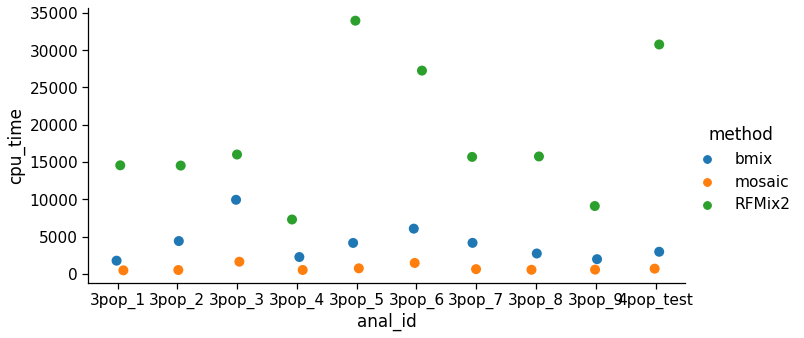

In [98]:
# Show each observation with a scatterplot
#data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')
sns.catplot(
    x="anal_id",
    y="cpu_time",
    hue="method",
    #col='ancestry',
    hue_order = ['bmix', 'mosaic', 'RFMix2'],
    data=bench.sort_values('anal_id'),
    dodge=0,
    alpha=1,
    zorder=1,
    kind='strip',
    aspect = 2,
    s=10
)
g.set_xticklabels(list(names_dict.values()), rotation=60)
g.set_ylabels('total cpu time (S)')